Here we're using PCA to remove covariance in our data.

Generate some random data - with some covariance

In [1]:
import numpy as np
from sklearn import datasets


def _generating_data():
    random_state = 180
    X, _ = datasets.make_blobs(n_samples=50, n_features = 2, 
                               centers=3, cluster_std=[3, 2, 3], 
                               random_state=random_state)
    transformation = [[1.6, -0.6], [-0.8, 0.8]]
    X_aniso = np.dot(X, transformation)
    X_aniso[:,0] = X_aniso[:,0]-7
    X_aniso[:,1] = X_aniso[:,1]+17
    return X_aniso


X = _generating_data()
X_mean = np.mean(X, axis=0)
print(X_mean)

[ 4.13860769 10.41419801]


Let's look at the data. There seems to be some negative covariance in the two dimensions.

In [2]:
import matplotlib.pyplot as plt

x,y = X.T
plt.scatter(x, y)
plt.show()

<Figure size 640x480 with 1 Axes>

Re-centre the data so the mean is at the origin and compute the covariance matrix

In [3]:
X_centred = X - X_mean
X_cov = np.matmul(X_centred.T,X_centred)/(np.shape(X)[0]-1) # the demominator could be N or (N-1)
#print('conv can also be calculated using numpy function')
#X_cov = np.cov(X_centred.T)

Looking at the covariance matrix there is a negative covariance between the two dimensions

In [4]:
print(X_cov)

[[ 30.33637282 -10.92302986]
 [-10.92302986   8.66132702]]


Compute the eigenvalues and eigenvectors

In [5]:
eig_vals, eig_vecs = np.linalg.eig(X_cov)

and check to see what they contain

In [6]:
print('eig_vals:')
print(eig_vals)
print('eig_vectors:')
print(eig_vecs)

eig_vals:
[34.88600313  4.11169671]
eig_vectors:
[[ 0.92312589  0.38449785]
 [-0.38449785  0.92312589]]


Now let's map the points into the PCA space

In [7]:
X_pca = np.matmul(X_centred, eig_vecs)

We can visualise the original and new points. Note - it doesn't make sense to plot these in the same figure as they have different axis. But doing it here to give you an idea of what has happened.

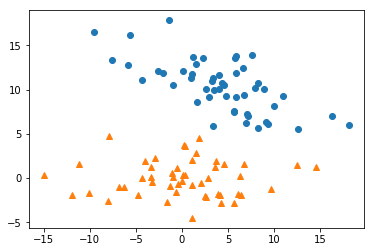

In [8]:
plt.plot(x,y, 'o')
x_p, y_p = X_pca.T
plt.plot(x_p, y_p, '^')

plt.show()